# **PyTorch Refersher**
---

The following notebook is a quick reference to refresh the basic features in PyTorch, and how to build basic to more complex neural networks.

In [1]:
# %pip install torch torchvision

In [2]:
import torch
import numpy as np

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## Tensor Operations
---

In [4]:
tensor = torch.tensor([1,2,3], dtype=torch.float32)
print(tensor)

tensor([1., 2., 3.])


In [5]:
tensor = torch.tensor([[1,0],[0,1]])
print(tensor)

tensor([[1, 0],
        [0, 1]])


In [6]:
np_array = np.array([1,2,3])
print(np_array)
np_array = np.array([1,2,3], dtype=np.float32)
print(np_array)
np_array = np.array([[1,2,3],[4,5,6]])
print(np_array)


[1 2 3]
[1. 2. 3.]
[[1 2 3]
 [4 5 6]]


In [7]:
tensor= torch.from_numpy(np_array)
print(tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [8]:
torch.randint(1,3,[1,2])

tensor([[1, 2]])

- ones, zeroes, rand, randn, randint are tensor generation operations.
- randn generates from a Z-distribution.
- randint requires a high, low, then an array shape in a list form.
- rand generates from a uniform distribution.

In [9]:
a = torch.ones(1,3, dtype=torch.float32)
b = torch.tensor([1,2,3], dtype=torch.float32)

In [10]:
print(a+b)
print(a*b)
print(a/b)
print(a%b)
print(a**b)
print(a.add(b))
print(a.mul(b))
print(a.div(b))

tensor([[2., 3., 4.]])
tensor([[1., 2., 3.]])
tensor([[1.0000, 0.5000, 0.3333]])
tensor([[0., 1., 1.]])
tensor([[1., 1., 1.]])
tensor([[2., 3., 4.]])
tensor([[1., 2., 3.]])
tensor([[1.0000, 0.5000, 0.3333]])


In [11]:
# print(torch.matmul(a,b))
# print(torch.mm(a,b.transpose(0,1)))


- operator between two operands seem to behave as element-wise operations for each tensor position.
- $a*b$ is equivalent to $a.mul(b)$

## Autograd
---

In [12]:
x = torch.tensor([4.0], requires_grad=True)

y=x**2
z=y*2 + 5
z.backward()
print(x.grad)

tensor([16.])


## Neural Network Implementation
---

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(4,3)
        self.layer2 = nn.Linear(3,5)
        self.layer3 = nn.Linear(5,1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [14]:
model_1 = NeuralNetwork()
print(model_1)

NeuralNetwork(
  (layer1): Linear(in_features=4, out_features=3, bias=True)
  (layer2): Linear(in_features=3, out_features=5, bias=True)
  (layer3): Linear(in_features=5, out_features=1, bias=True)
)


In [15]:
x = torch.randn(2,4)
print(x)
print(model_1(x))

tensor([[-0.5222,  0.2677,  1.1854,  0.2545],
        [ 2.0640, -1.9265,  0.5377, -1.9240]])
tensor([[0.4390],
        [0.2732]], grad_fn=<AddmmBackward0>)


## Training Loop

---
The below implemenation is a feed-forward neural network for regression.

In [16]:
# %pip install scikit-learn

In [17]:
from sklearn.model_selection import train_test_split

x = torch.randn(500,4)
y = torch.randn(500,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

torch.Size([400, 4]) torch.Size([100, 4]) torch.Size([400, 1]) torch.Size([100, 1])


In [18]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr= 0.001)

for epoch in range(10000):
    y_pred = model_1(x_train)
    loss = criterion(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")




Epoch 0, Loss: 1.3411787748336792
Epoch 10, Loss: 1.3303791284561157
Epoch 20, Loss: 1.3200912475585938
Epoch 30, Loss: 1.3103277683258057
Epoch 40, Loss: 1.3010759353637695
Epoch 50, Loss: 1.2922738790512085
Epoch 60, Loss: 1.2839256525039673
Epoch 70, Loss: 1.2759875059127808
Epoch 80, Loss: 1.2684550285339355
Epoch 90, Loss: 1.2613030672073364
Epoch 100, Loss: 1.2545101642608643
Epoch 110, Loss: 1.248051404953003
Epoch 120, Loss: 1.241909384727478
Epoch 130, Loss: 1.2360767126083374
Epoch 140, Loss: 1.2305397987365723
Epoch 150, Loss: 1.2252978086471558
Epoch 160, Loss: 1.2203402519226074
Epoch 170, Loss: 1.215622067451477
Epoch 180, Loss: 1.2111601829528809
Epoch 190, Loss: 1.2069201469421387
Epoch 200, Loss: 1.2029014825820923
Epoch 210, Loss: 1.1991020441055298
Epoch 220, Loss: 1.1954865455627441
Epoch 230, Loss: 1.1920537948608398
Epoch 240, Loss: 1.1887983083724976
Epoch 250, Loss: 1.1856811046600342
Epoch 260, Loss: 1.1827243566513062
Epoch 270, Loss: 1.1799176931381226
Epoch 

## Dataset and Dataloader
---

In [19]:
import torch
import torch.nn.functional as F
import torch.optim as optimizer
from torch.utils.data import Dataset, DataLoader
import numpy

In [20]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [21]:
X = torch.rand(1000,5)
y = torch.rand(1000,1)

dataset = CustomDataset(X, y)

In [ ]:
# for it in iter(dataset):
#     print(it)

(tensor([0.9856, 0.4249, 0.3534, 0.2675, 0.6828]), tensor([0.5207]))
(tensor([0.8584, 0.6621, 0.5185, 0.4571, 0.1326]), tensor([0.2499]))
(tensor([0.7966, 0.5877, 0.7099, 0.5848, 0.1832]), tensor([0.5223]))
(tensor([0.4704, 0.6021, 0.1558, 0.8201, 0.8802]), tensor([0.3123]))
(tensor([0.0143, 0.9485, 0.8521, 0.3478, 0.1143]), tensor([0.3751]))
(tensor([0.2041, 0.4109, 0.7949, 0.4804, 0.7271]), tensor([0.9491]))
(tensor([0.2713, 0.6602, 0.2913, 0.9697, 0.6332]), tensor([0.7287]))
(tensor([0.1107, 0.0770, 0.6025, 0.6242, 0.7777]), tensor([0.4178]))
(tensor([0.0728, 0.4817, 0.1493, 0.4874, 0.7104]), tensor([0.2720]))
(tensor([0.9565, 0.8386, 0.9451, 0.4263, 0.3454]), tensor([0.6552]))
(tensor([0.9456, 0.6519, 0.2136, 0.5423, 0.1919]), tensor([0.5329]))
(tensor([0.1519, 0.5143, 0.7890, 0.8468, 0.9592]), tensor([0.7728]))
(tensor([0.4180, 0.6030, 0.0188, 0.5767, 0.4091]), tensor([0.7818]))
(tensor([0.2346, 0.9347, 0.6479, 0.9968, 0.1998]), tensor([0.3136]))
(tensor([0.9558, 0.2376, 0.0642, 0

### Load MNIST Dataset from torchvision

In [23]:
from torchvision import datasets, transforms

In [24]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

mnist_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

In [25]:
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


In [26]:
BATCH_SIZE = 32
train_loader = DataLoader(
    dataset=mnist_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    drop_last=False
)

In [ ]:
# for batch_id, (X, y) in enumerate(train_loader):
#     print(f"Batch: {batch_id}")
#     print(f"Input size: {X.shape}")
#     print(f"Target: {y.shape}")

Batch: 0
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 1
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 2
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 3
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 4
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 5
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 6
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 7
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 8
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 9
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 10
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 11
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 12
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 13
Input size: torch.Size([3

In [28]:
from torch.utils.data import random_split

total_size = len(mnist_dataset)
train_size = int(0.8 * total_size)
test_size = total_size - train_size

print(f"Total Size: {total_size}, Train Size: {train_size}, Test Size: {test_size}")

Total Size: 60000, Train Size: 48000, Test Size: 12000


In [29]:
train_dataset, test_dataset = random_split(mnist_dataset, [train_size, test_size])

train_loader = DataLoader(
    train_dataset, 
    batch_size=BATCH_SIZE,
    shuffle=True
    )

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

## Training, Evaluation, Plotting Functions
---

In [30]:
NUM_EPOCHS = 30

def train_model(model, optimizer, criterion, train_loader, test_loader, num_epochs=30, device='cpu'):
    
    # Move model to device
    model = model.to(device)
    
    # For tracking metrics
    train_losses = []
    test_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):

        #Training Phase
        model.train()
        # print(f"Epoch {epoch} in progress...")
        running_loss = 0

        for batch_idx, (X, y) in enumerate(train_loader):
            
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            output = model.forward(X)
            loss = criterion(output, y)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        
        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        #Evaluation Phase
        model.eval()

        test_loss = 0
        correct = 0
        with torch.no_grad():

            for (X,y) in test_loader:
                X, y = X.to(device), y.to(device)
                output = model.forward(X)
                test_loss += criterion(output, y).item()

                # Get the index of the max log-probability
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(y.view_as(pred)).sum().item()
                

        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        
        accuracy = 100. * correct / len(test_loader.dataset)
        test_accuracies.append(accuracy)
        
        print(f'Epoch: {epoch+1}/{num_epochs}')
        print(f'Train Loss: {avg_train_loss:.4f}')
        print(f'Test Loss: {test_loss:.4f}')
        print(f'Test Accuracy: {accuracy:.2f}%\n')
    
    return train_losses, test_losses, test_accuracies


In [31]:
def evaluate_model(model, test_loader, device):
    model.eval()
    all_pred = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model.forward(data)
            pred = output.argmax(dim=1)

            all_pred.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            
    return all_pred, all_targets

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [33]:
def plot_eval_res(predictions, targets):
    
    cm = confusion_matrix(targets, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print(classification_report(targets, predictions))    


In [34]:
def plot_train_metrics(train_losses, test_losses, test_accuracies):
    # Plot training and validation loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(test_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curves')

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(test_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.title('Accuracy Curve')

    plt.tight_layout()
    plt.show()

## Model Building
---
This NN is to test a basic CNN on the MNIST dataset using the above defined trainer and helper funtions.

In [35]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [36]:
class NN_Custom(nn.Module):
    def __init__(self):
        super(NN_Custom, self).__init__()
        self.layer1 = nn.Conv2d(1, 16, (3, 3))  # 1 input channel, 16 output channels
        self.pool = nn.AdaptiveMaxPool2d((1,1))
        self.flatten = nn.Flatten()

        x = torch.randn(1,1,28,28)
        x = self.pool(self.layer1(x))
        x = self.flatten(x)
        print(x.shape[1])
        self.layer2 = nn.Linear(x.shape[1], 10)
        # self.layer2 = nn.Linear(16 * 26 * 26, 10)  # Adjusted for output size after conv layer

    def forward(self, x):
        x = self.layer1(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.layer2(x)
        return x


In [37]:

model_2 = NN_Custom()
# model_2.forward(torch.randn(1, 1, 28, 28))

optimizer_2 = optim.SGD(model_2.parameters(), lr=0.001)
criterion_2 = nn.CrossEntropyLoss()

train_losses, test_losses, test_accuracies = train_model(
    model_2, 
    optimizer_2, 
    criterion_2, 
    train_loader, 
    test_loader, 
    num_epochs=NUM_EPOCHS,
    device=device
)

16
Epoch: 1/30
Train Loss: 2.2891
Test Loss: 2.2636
Test Accuracy: 22.97%

Epoch: 2/30
Train Loss: 2.2492
Test Loss: 2.2362
Test Accuracy: 27.06%

Epoch: 3/30
Train Loss: 2.2214
Test Loss: 2.2089
Test Accuracy: 29.09%

Epoch: 4/30
Train Loss: 2.1929
Test Loss: 2.1785
Test Accuracy: 32.39%

Epoch: 5/30
Train Loss: 2.1607
Test Loss: 2.1456
Test Accuracy: 31.67%

Epoch: 6/30
Train Loss: 2.1246
Test Loss: 2.1076
Test Accuracy: 32.59%

Epoch: 7/30
Train Loss: 2.0859
Test Loss: 2.0677
Test Accuracy: 32.73%

Epoch: 8/30
Train Loss: 2.0454
Test Loss: 2.0269
Test Accuracy: 33.86%

Epoch: 9/30
Train Loss: 2.0050
Test Loss: 1.9865
Test Accuracy: 35.52%

Epoch: 10/30
Train Loss: 1.9654
Test Loss: 1.9481
Test Accuracy: 36.76%

Epoch: 11/30
Train Loss: 1.9277
Test Loss: 1.9119
Test Accuracy: 36.23%

Epoch: 12/30
Train Loss: 1.8921
Test Loss: 1.8776
Test Accuracy: 38.16%

Epoch: 13/30
Train Loss: 1.8589
Test Loss: 1.8452
Test Accuracy: 38.86%

Epoch: 14/30
Train Loss: 1.8278
Test Loss: 1.8156
Test Ac

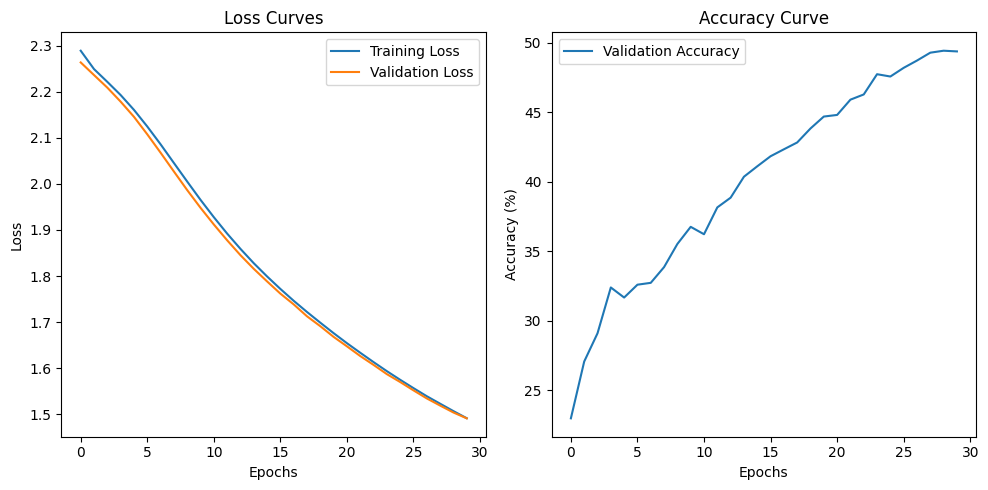

In [38]:
plot_train_metrics(train_losses, test_losses, test_accuracies)

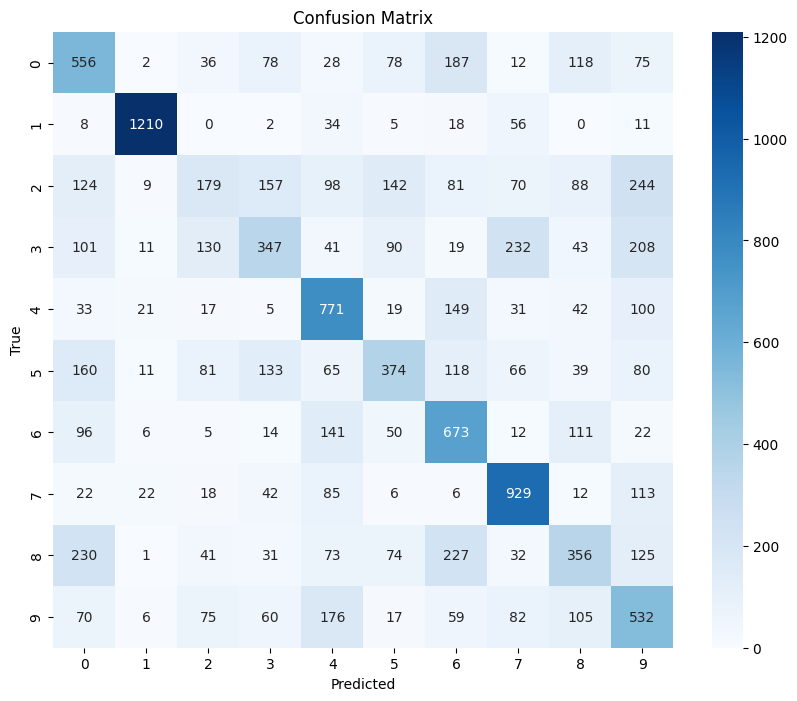

              precision    recall  f1-score   support

           0       0.40      0.48      0.43      1170
           1       0.93      0.90      0.92      1344
           2       0.31      0.15      0.20      1192
           3       0.40      0.28      0.33      1222
           4       0.51      0.65      0.57      1188
           5       0.44      0.33      0.38      1127
           6       0.44      0.60      0.50      1130
           7       0.61      0.74      0.67      1255
           8       0.39      0.30      0.34      1190
           9       0.35      0.45      0.40      1182

    accuracy                           0.49     12000
   macro avg       0.48      0.49      0.47     12000
weighted avg       0.48      0.49      0.48     12000



In [39]:
pred, target = evaluate_model(model_2, test_loader, device)

plot_eval_res(pred, target)

## Deeper CNN
---
Compare performance with baseline CNN model defined above (namely $model_2$)

In [40]:
class DeepCNN_1(nn.Module):
    def __init__(self):
        super(DeepCNN_1, self).__init__()

        #Convolutional Block 1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        #Convolutional Block 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        #Fully Concnected Layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # First block
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        # Second block
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool2(x)
        
        # Flatten and fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

In [41]:
model_3 = DeepCNN_1()

In [42]:
optimizer_3 = optim.Adam(model_3.parameters(), lr = 0.001)
scheduler_3 = optim.lr_scheduler.ReduceLROnPlateau(optimizer_3, 'min', patience=3, factor=0.5)
criterion_3 = nn.CrossEntropyLoss()

Epoch: 1/30
Train Loss: 0.2317
Test Loss: 0.0712
Test Accuracy: 97.71%

Epoch: 2/30
Train Loss: 0.1120
Test Loss: 0.0458
Test Accuracy: 98.62%

Epoch: 3/30
Train Loss: 0.0806
Test Loss: 0.0482
Test Accuracy: 98.58%

Epoch: 4/30
Train Loss: 0.0689
Test Loss: 0.0341
Test Accuracy: 98.98%

Epoch: 5/30
Train Loss: 0.0604
Test Loss: 0.0343
Test Accuracy: 99.06%

Epoch: 6/30
Train Loss: 0.0521
Test Loss: 0.0353
Test Accuracy: 99.01%

Epoch: 7/30
Train Loss: 0.0435
Test Loss: 0.0311
Test Accuracy: 99.17%

Epoch: 8/30
Train Loss: 0.0414
Test Loss: 0.0311
Test Accuracy: 99.17%

Epoch: 9/30
Train Loss: 0.0362
Test Loss: 0.0286
Test Accuracy: 99.21%

Epoch: 10/30
Train Loss: 0.0337
Test Loss: 0.0350
Test Accuracy: 99.21%

Epoch: 11/30
Train Loss: 0.0305
Test Loss: 0.0334
Test Accuracy: 99.17%

Epoch: 12/30
Train Loss: 0.0281
Test Loss: 0.0357
Test Accuracy: 99.14%

Epoch: 13/30
Train Loss: 0.0259
Test Loss: 0.0341
Test Accuracy: 99.20%

Epoch: 14/30
Train Loss: 0.0241
Test Loss: 0.0319
Test Accur

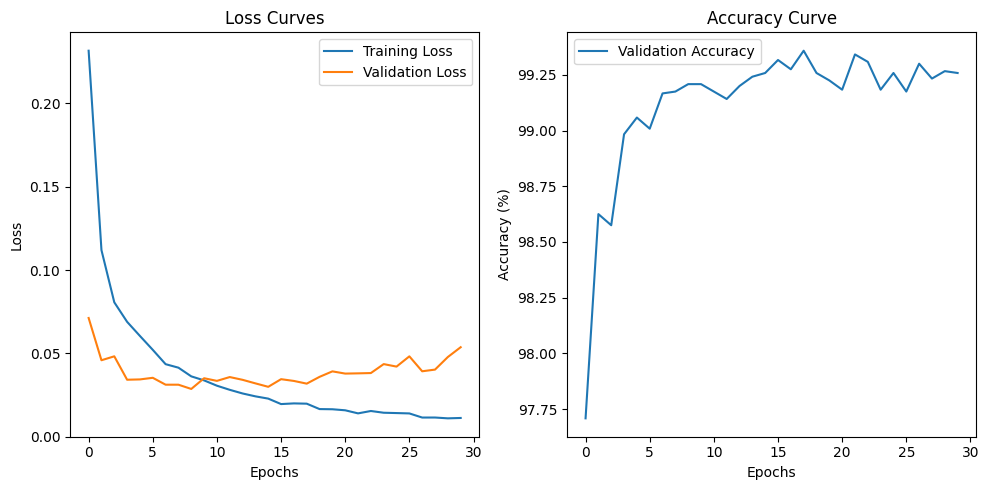

In [43]:
train_losses_3, test_losses_3, test_accuracies_3 = train_model(
    model_3, 
    optimizer_3, 
    criterion_3, 
    train_loader, 
    test_loader, 
    num_epochs=NUM_EPOCHS,
    device=device
)

plot_train_metrics(train_losses_3, test_losses_3, test_accuracies_3)

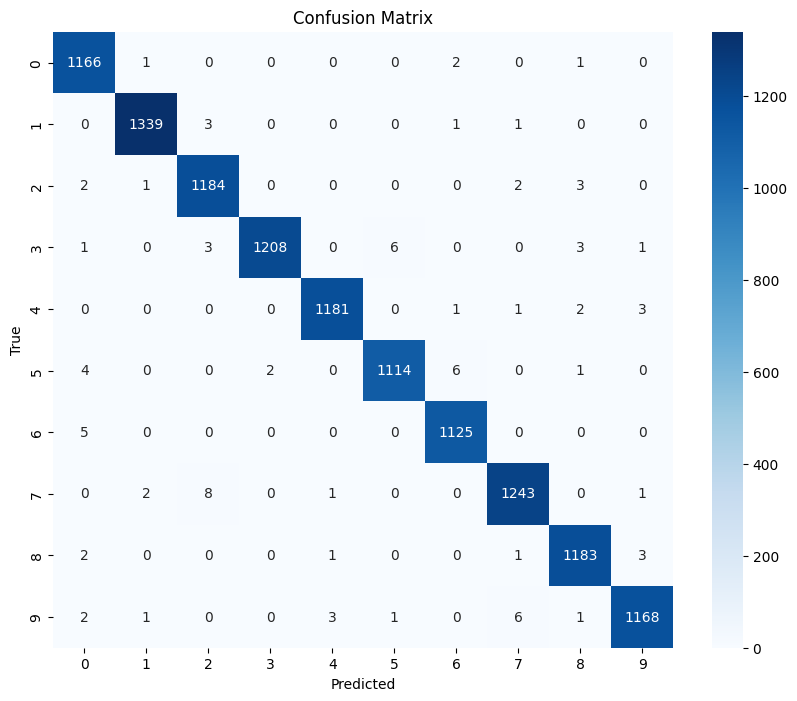

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1170
           1       1.00      1.00      1.00      1344
           2       0.99      0.99      0.99      1192
           3       1.00      0.99      0.99      1222
           4       1.00      0.99      0.99      1188
           5       0.99      0.99      0.99      1127
           6       0.99      1.00      0.99      1130
           7       0.99      0.99      0.99      1255
           8       0.99      0.99      0.99      1190
           9       0.99      0.99      0.99      1182

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [44]:
pred_3, target_3 = evaluate_model(model_3, test_loader, device)

plot_eval_res(pred_3, target_3)

This covers the fundamental concepts of PyTorch. 

Some next topics:
- More complex neural network architectures
- Transfer learning
- Custom loss functions
- Model saving and loading
- Batch processing